In [102]:
# IMPORT NECESARY LIBRARIES
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
# LOAD THE IRIS DATASET
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].apply(lambda x: iris.target_names[x])

# DISPLAY DATAFRAME
display(df)
print(df['target'].unique())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


['setosa' 'versicolor' 'virginica']


In [91]:
# SELECT THE FEATURE AND THE TARGET
X = iris.data
y = iris.target

# SPLIT THE DATA INTO TRAINING AND TESTING SETS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# MODEL DEFINITION
lr_model = LogisticRegression(max_iter=10, C=0.01)

# MODEL TRAINING
lr_model.fit(X_train, y_train)

# MODEL PREDICTION
lr_y_pred = lr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
def show_confusion_matrix(test, pred):
  cm = confusion_matrix(test, pred)
  plt.imshow(cm, interpolation = "nearest")
  class_names = [0,1,2]
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # Create a heatmap in to the confusion matrix
  sns.heatmap(pd.DataFrame(cm), annot=True, cmap=plt.cm.Blues, fmt='g')
  plt.tight_layout()
  plt.title('Confusion Matrix')
  plt.xlabel('Predict')
  plt.ylabel('Real')

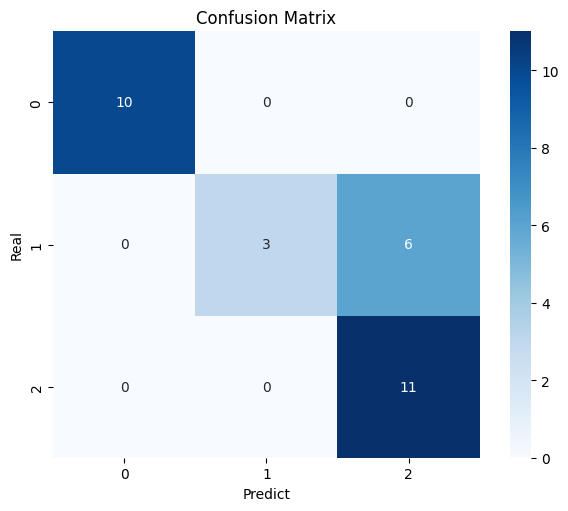

In [94]:
# CALL THE CONFUSION MATRIX FUNCTION
show_confusion_matrix(y_test, lr_y_pred)

In [95]:
# Calculate and print the evaluation metrics
print(f"Accuracy: {accuracy_score(y_test, lr_y_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_y_pred, average='weighted'):.4f}")
print("Recall:", recall_score(y_test, lr_y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, lr_y_pred, average='weighted'),"\n\n")

# Print a classification report
print(classification_report(y_test, lr_y_pred))

Accuracy: 0.8000
Precision: 0.8706
Recall: 0.8
F1-score: 0.7714285714285715 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.33      0.50         9
           2       0.65      1.00      0.79        11

    accuracy                           0.80        30
   macro avg       0.88      0.78      0.76        30
weighted avg       0.87      0.80      0.77        30



In [96]:
# METRICAS HECHAS A MANO
print(f'Accuracy: {(10 + 3 + 11)/(10 + 0 + 0 + 0 + 3 + 6 + 0 + 0 + 11):.4f}')

precision_0 = (10/(10 + 0 + 0))*10
precision_1 = (3/(3 + 0 + 0))*9
precision_2 = (11/(11 + 6 + 0))*11
precision = (precision_0 + precision_1 + precision_2)/30
print(f'Precision: {precision:4f}')

recall_0 = (10/(10+0+0))*10
recall_1 = (3/(3+6+0))*9
recall_2 = (11/(11+0+0))*11
recall = (recall_0 + recall_1 + recall_2)/30
print(f'Recall: {recall:4f}')

f1_0 = (2*precision_0*recall_0)/(precision_0 + recall_0)
f1_1 = (2*precision_1*recall_1)/(precision_1 + recall_1)
f1_2 = (2*precision_2*recall_2)/(precision_2 + recall_2)
f1 = (f1_0 + f1_1 + f1_2)/30
print(f'F1-score: {f1:4f}')

Accuracy: 0.8000
Precision: 0.870588
Recall: 0.800000
F1-score: 0.771429


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

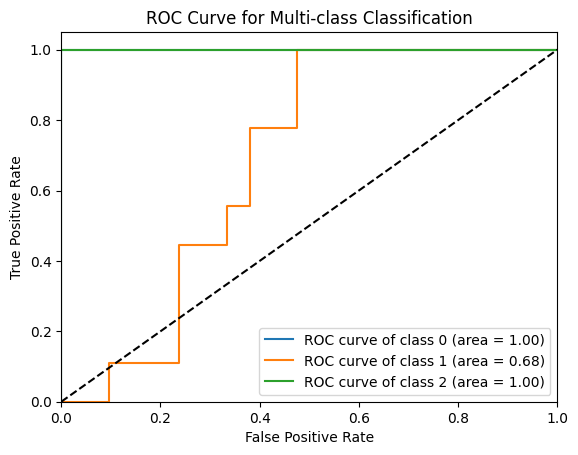

In [107]:
# CREATE THE ROC CURVE IN A MULTICLASS

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(max_iter=10, C=0.01))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Calculate ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = roc_auc_score(y_test_bin.ravel(), y_score.ravel())

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend(loc="lower right")
plt.show()